<a href="https://colab.research.google.com/github/jindaldisha/Data-Analysis-with-Python/blob/main/02_analyzing_tabular_data_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Tabular Data with Pandas

To do:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files

## Reading a CSV file into a Pandas data frame

In [1]:
#Import pandas
import pandas as pd

In [2]:
#Import data 
df = pd.read_csv('https://raw.githubusercontent.com/jindaldisha/Data-Analysis-with-Python/main/datasets/italy-covid-daywise.csv')
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [3]:
#View basic information about rows, columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [4]:
#View statistic information for numeric columns
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [5]:
#List of columns 
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [6]:
#View shape (no. of rows and columns)
df.shape

(248, 4)

##Retrieving data from Pandas data frames

Conceptually, a pandas dataframe can be thought of as a dictionary of lists, the keys are the column names, and the values are lists/arrays containing data representing columns.

In [7]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Each column is represented using a data structure called Series, which is esentially a numpy array with some extra methods and properties.

In [8]:
#Retrieving data from a particular column
df['date'], type(df['date'])

(0      2019-12-31
 1      2020-01-01
 2      2020-01-02
 3      2020-01-03
 4      2020-01-04
           ...    
 243    2020-08-30
 244    2020-08-31
 245    2020-09-01
 246    2020-09-02
 247    2020-09-03
 Name: date, Length: 248, dtype: object, pandas.core.series.Series)

In [9]:
#Retrieving a specific value within a column
df['date'][5]

'2020-01-05'

In [10]:
#Using the .at method to directly retrieve at a specific row and column
df.at[5, 'date']

'2020-01-05'

In [11]:
#Create a copy of the data  since it creates a copy, modifying data within one doesn't affect the other
df_copy = df.copy()
df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [12]:
#To access a specific row - .loc retrieves row at a given index
df.loc[5]

date          2020-01-05
new_cases              0
new_deaths             0
new_tests            NaN
Name: 5, dtype: object

In [13]:
#To access first few rows - .head()
#To access last few rows - .tail()
df.head(), df.tail()

(         date  new_cases  new_deaths  new_tests
 0  2019-12-31        0.0         0.0        NaN
 1  2020-01-01        0.0         0.0        NaN
 2  2020-01-02        0.0         0.0        NaN
 3  2020-01-03        0.0         0.0        NaN
 4  2020-01-04        0.0         0.0        NaN,
            date  new_cases  new_deaths  new_tests
 243  2020-08-30     1444.0         1.0    53541.0
 244  2020-08-31     1365.0         4.0    42583.0
 245  2020-09-01      996.0         6.0    54395.0
 246  2020-09-02      975.0         8.0        NaN
 247  2020-09-03     1326.0         6.0        NaN)

In [14]:
#To find the first index that doesn't contain a NaN value
df.new_tests.first_valid_index()

111

In [15]:
#Checking a few rows before and after to verify that the values indeed change from NaN to actual values
df.loc[105:115]

,date,new_cases,new_deaths,new_tests
105,2020-04-14,3153.0,564.0,NaN
106,2020-04-15,2972.0,604.0,NaN
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0


In [16]:
#To retrieve a random sample of rows from the data frame
#The original index of each row is preserved
df.sample(10)

,date,new_cases,new_deaths,new_tests
206,2020-07-24,306.0,10.0,28970.0
155,2020-06-03,318.0,55.0,20035.0
112,2020-04-21,2256.0,454.0,28095.0
126,2020-05-05,1221.0,195.0,32211.0
119,2020-04-28,1739.0,333.0,37554.0
214,2020-08-01,379.0,9.0,31905.0
31,2020-01-31,3.0,0.0,NaN
192,2020-07-10,214.0,12.0,27251.0
84,2020-03-24,4789.0,601.0,NaN
145,2020-05-24,669.0,119.0,34206.0


## Analyzing Data from Data Frames

In [17]:
  #Total number of reported cases and deaths related to Covid-19 in Italy from our dataset
  total_cases = df.new_cases.sum()
  total_deaths = df.new_deaths.sum()
  print(f'Reported Cases: {total_cases}\nReported Deaths: {total_deaths}')

Reported Cases: 271515.0
Reported Deaths: 35497.0


In [18]:
#Overall death ratio (ration of reported deaths to reported cases)
death_rate = total_deaths / total_cases
print(f'Death Rate: {death_rate*100} %')

Death Rate: 13.073679170579894 %


In [19]:
 #Total number of tests conducted
 #Note: 935310 tests were conducted before daily test numbers were being reported
 initial_tests = 935310
 reported_tests = df.new_tests.sum()
 total_tests = initial_tests + reported_tests
 print(f'Total Tests: {total_tests}')

Total Tests: 5214766.0


In [20]:
#Positve Rate (ratio of people who tested positive to people who took a test)
positive_rate = total_cases / total_tests
print(f'Positive Rate: {positive_rate*100}%')

Positive Rate: 5.206657403227681%


## Querying and Sorting Rows

In [21]:
# Days with more than 1000 reported cases
high_new_cases = df.new_cases > 1000
high_new_cases 

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [22]:
#View days with high new cases - Rows with True value are returned
df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [23]:
#View all the rows
from IPython.display import display
with pd.option_context('display.max_row', 100):  #Display 100 rows
  display(df[df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [24]:
#Determine days when the number of positive tested are higher than the overall positive_rate
higher_ratio = df[df.new_cases / df.new_tests > positive_rate]

In [25]:
higher_ratio

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [26]:
#Adding a new column to the data frame of positive rate every day
df['positive_rate'] = df.new_cases / df.new_tests

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           248 non-null    object 
 1   new_cases      248 non-null    float64
 2   new_deaths     248 non-null    float64
 3   new_tests      135 non-null    float64
 4   positive_rate  135 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [28]:
#Removing a Column
df.drop(columns = ['positive_rate'], inplace=True) #inplace performs the action in-place

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [30]:
#Sort the rows by a specific column. (By new cases)
df.sort_values('new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
28,2020-01-28,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [31]:
#Sort the rows by a specific column (By new deaths)
df.sort_values('new_deaths', ascending=False)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
...,...,...,...,...
34,2020-02-03,0.0,0.0,NaN
35,2020-02-04,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
0,2019-12-31,0.0,0.0,NaN


It appears the daily death hits a peak just about a week after the peak in daily new cases.

Also there is anegative entry in the new cases column.

For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely


We can use the `.at` method to modify a specific value within the dataframe.

In [32]:
#We're going to follow the third approach 
df.at[172, 'new_cases'] = (df.at[171, 'new_cases'] + df.at[173, 'new_cases'])/2 

In [33]:
df.loc[172]

date          2020-06-20
new_cases          297.5
new_deaths            47
new_tests          29875
Name: 172, dtype: object

## Working with Dates

In [34]:
df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [35]:
df['date'] = pd.to_datetime(df.date)

In [36]:
df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [37]:
#Extract different parts of the data into seperate columns using DatetimeIndex

df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [38]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [39]:
#Extract information for the month of May
df_may = df[df.month == 5]
df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [40]:
df_may.describe()

,new_cases,new_deaths,new_tests,year,month,day,weekday
count,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.000000
mean,937.838710,182.516129,34797.419355,2020.0,5.0,16.000000,3.193548
std,458.224843,91.088188,7403.552952,0.0,0.0,9.092121,2.039924
min,300.000000,50.000000,13665.000000,2020.0,5.0,1.000000,0.000000
25%,617.500000,118.000000,31307.500000,2020.0,5.0,8.500000,1.500000
50%,802.000000,165.000000,37049.000000,2020.0,5.0,16.000000,3.000000
75%,1274.000000,239.000000,40032.000000,2020.0,5.0,23.500000,5.000000
max,1965.000000,474.000000,45428.000000,2020.0,5.0,31.000000,6.000000


In [41]:
df_may_metrics = df_may[['new_cases', 'new_deaths', 'new_tests']]
df_may_metrics.sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [42]:
#The above operations can be performed in a single step
df[df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

## Grouping and Aggregation

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method. 

In [43]:
df.groupby('month')

In [44]:
month_df = df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [45]:
month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [46]:
weekday_df = df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [47]:
weekday_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series.

In [48]:
# Add three new columns: `total_cases`, `total_deaths`, and `total_tests`.
df['total_cases'] = df.new_cases.cumsum()
df['total_deaths'] = df.new_deaths.cumsum()
df['total_tests'] = df.new_tests.cumsum() + initial_tests

In [49]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population.

In [50]:
#Importing another csv file which contains information for different countries around the world
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7fe0c4053850>)

In [51]:
locations_df = pd.read_csv('locations.csv')

In [52]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [53]:
#Viewing data for Italy
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [54]:
#Adding a location column to our original dataframe
df['location'] = 'Italy'

In [55]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `df` using the `.merge` method.

In [56]:
merged_df = df.merge(locations_df, on='location')

In [57]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `df`. If the `df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [59]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 /merged_df.population

In [60]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file.

In [61]:
# Create a DataFrame with the specific set of columns that we want to write into the file.

result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

In [62]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


In [63]:
#Write the data from the data frame into a file 
result_df.to_csv('results.csv', index=None)

In [64]:
#Checking to see if the file has been created 
import os
os.listdir('.')

['.config', 'results.csv', 'locations.csv', 'sample_data']

 ## Basic Plotting with Pandas

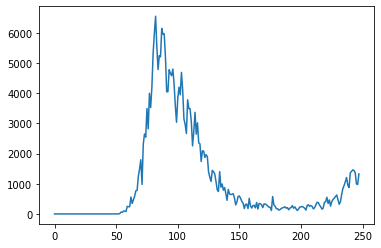

In [65]:
#Line graph showing how the number of dailt cases varies over time
result_df.new_cases.plot()

It is hard to figure out which data point corresponds to which date. Setting date as the index will help

In [66]:
#Setting date as the index of result_df
result_df.set_index('date', inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


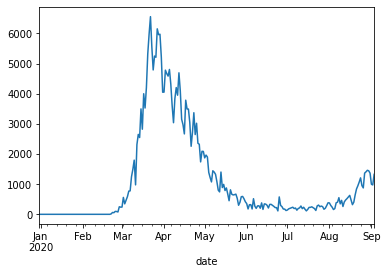

In [70]:
#Plotting with date as index
result_df.new_cases.plot();

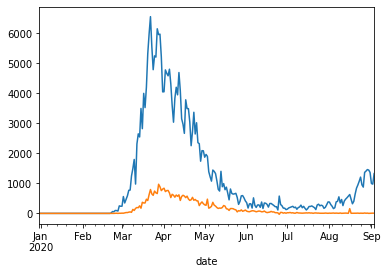

In [72]:
#Plot new cases and new deaths
result_df.new_cases.plot()
result_df.new_deaths.plot();


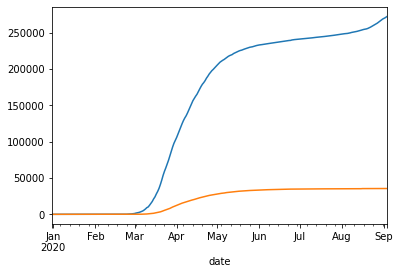

In [75]:
#Total Cases vs Total Deaths
result_df.total_cases.plot()
result_df.total_deaths.plot();

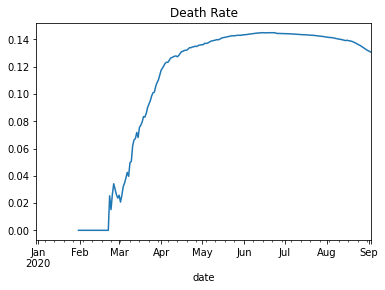

In [77]:
#Plot Death Rate
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate');

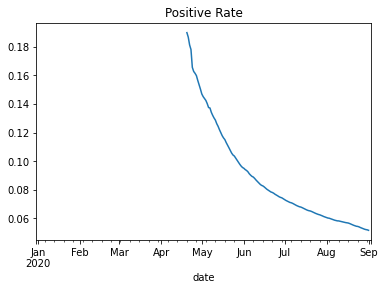

In [79]:
#Plot Positive Rate
positive_rate = result_df.total_cases / result_df.total_tests
positive_rate.plot(title='Positive Rate');

In [81]:
#Month wise bar graphs
month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


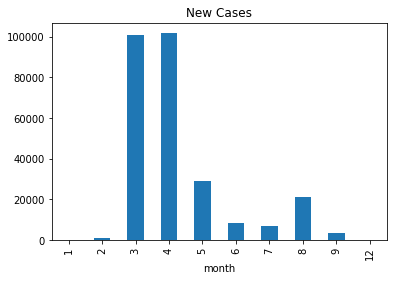

In [84]:
#Monthly new cases
month_df.new_cases.plot(kind='bar', title='New Cases');

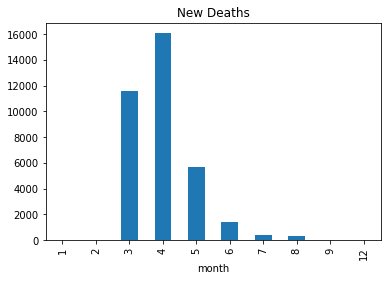

In [88]:
#Monthly new deaths
month_df.new_deaths.plot(kind='bar', title='New Deaths');

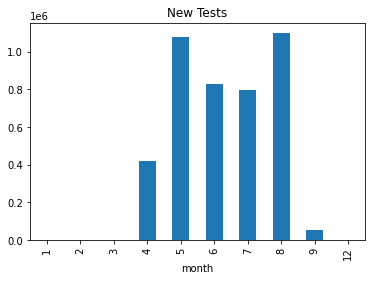

In [90]:
#Monthly new tests
month_df.new_tests.plot(kind='bar', title='New Tests');